<img src="https://upload.wikimedia.org/wikipedia/commons/b/b0/Logo_Universidad_Politécnica_Salesiana_del_Ecuador.png" width="90%">

<h3> Michelle Parraga </h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from tensorflow.keras import layers, models
import pickle
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import joblib
import copy
from sklearn import set_config
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image




El código realiza las siguientes acciones: primero, carga los datos desde un archivo CSV llamado 'df_anscombe.csv' en un DataFrame utilizando pandas. Esto permite manipular y analizar los datos de forma estructurada. Luego, agrupa los datos en el DataFrame por la columna 'group', creando subconjuntos basados en los valores únicos de esta columna. A continuación, aplica el método .describe() para generar un resumen estadístico para cada grupo. Este resumen incluye el número de observaciones (count), la media (mean), la desviación estándar (std), el valor mínimo (min), los cuartiles (25%, 50% o mediana, 75%), y el valor máximo (max) en cada grupo. Esta descripción proporciona una visión detallada de la distribución de los datos dentro de cada grupo, permitiendo identificar variaciones y patrones entre los subconjuntos del DataFrame.

In [2]:
# Cargar los datos desde el archivo CSV
data = pd.read_csv('df_anscombe.csv')

# Agrupar y describir los datos
data.groupby('group').describe()

x                                               y            \
      count mean       std  min  25%  50%   75%   max count      mean   
group                                                                   
1      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
2      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
3      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
4      11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                 
            std   min    25%   50%   75%    max  
group                                            
1      2.031568  4.26  6.315  7.58  8.57  10.84  
2      2.031657  3.10  6.695  8.14  8.95   9.26  
3      2.030424  5.39  6.250  7.11  7.98  12.74  
4      2.030579  5.25  6.170  7.04  8.19  12.50

El código configura el estilo de los gráficos usando `seaborn` con un fondo de rejilla blanca para mejorar la legibilidad. Luego, crea una figura con una cuadrícula de subplots de 2 filas y 2 columnas para mostrar gráficos de dispersión para cada grupo presente en los datos. La figura tiene un tamaño de 10x10 pulgadas para dar suficiente espacio a cada gráfico. El código obtiene los valores únicos de la columna `'group'` y, para cada grupo, selecciona el subplot correspondiente. Filtra los datos para el grupo actual y crea un gráfico de dispersión usando las columnas `'x'` y `'y'`, asignándolo al subplot. Se establece un título para cada gráfico indicando el grupo, y se limitan los ejes `x` y `y` para mantener una escala uniforme. Finalmente, se ajusta la disposición de los subplots para que se vean organizados y se muestran los gráficos.

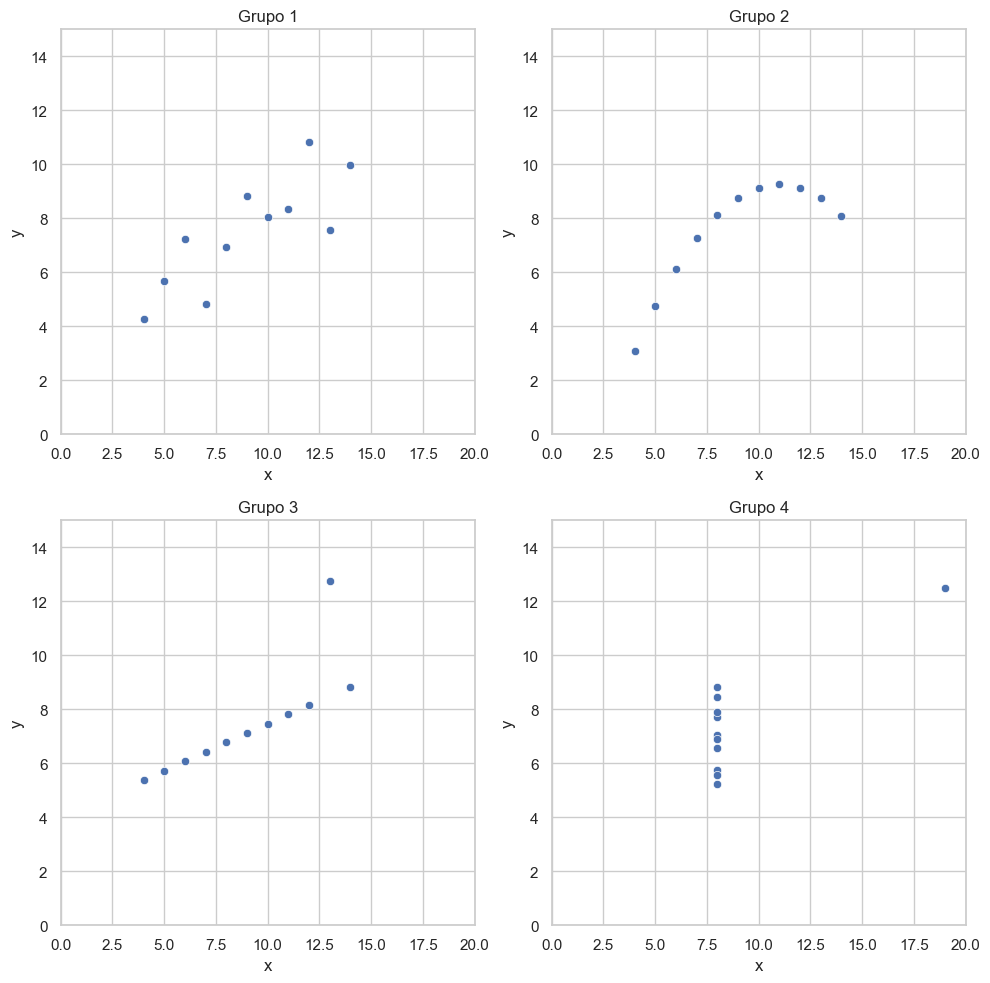

In [3]:
# Configuración del estilo
sns.set(style="whitegrid")

# Crear una figura con subplots para los 4 grupos
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Crear los gráficos de dispersión
groups = data['group'].unique()
for i, group in enumerate(groups):
    ax = axes[i // 2, i % 2]
    subset = data[data['group'] == group]
    sns.scatterplot(x='x', y='y', data=subset, ax=ax)
    ax.set_title(f'Grupo {group}')
    ax.set_xlim(0, 20)
    ax.set_ylim(0, 15)

plt.tight_layout()
plt.show()

El código crea un boxplot que compara la distribución de la variable `'y'` entre los diferentes grupos presentes en el conjunto de datos. Primero, se define una figura con un tamaño de 10x6 pulgadas para garantizar que el gráfico tenga suficiente espacio y se vea claro. Luego, utilizando `seaborn`, se genera el boxplot donde el eje `x` representa los distintos grupos (columna `'group'`) y el eje `y` muestra los valores de la variable `'y'` correspondientes a cada grupo. El boxplot visualiza la mediana, los cuartiles (25% y 75%), y los valores atípicos (outliers), proporcionando una visión clara de la distribución y variabilidad de los datos en cada grupo. A continuación, se añade un título al gráfico para describirlo como "Boxplot por grupo". Finalmente, el gráfico se muestra con `plt.show()`, permitiendo ver las diferencias en la distribución de la variable `'y'` entre los distintos grupos.

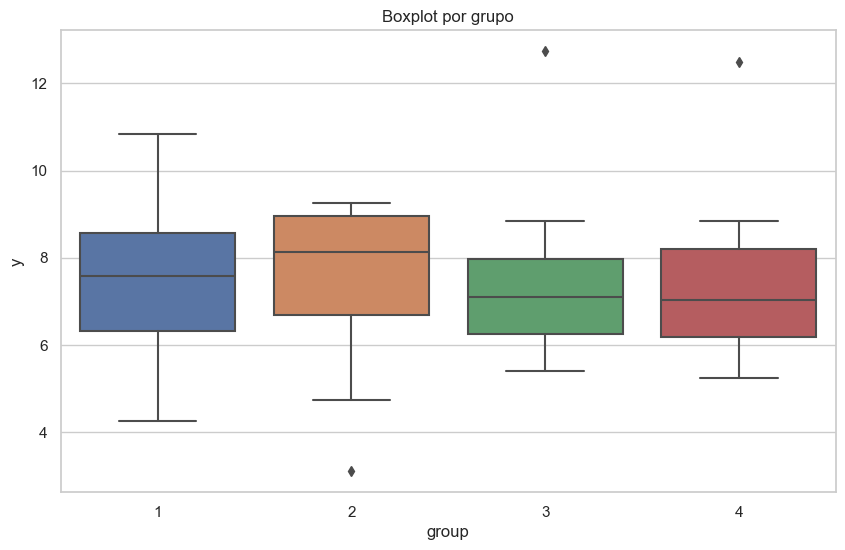

In [4]:


# Crear un boxplot para cada grupo
plt.figure(figsize=(10, 6))
sns.boxplot(x='group', y='y', data=data)
plt.title('Boxplot por grupo')

plt.show()
